**Import Libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

**Import CSV File**

In [3]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [5]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


**Summary**

In [7]:
df[['Brand']].value_counts()

Brand   
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Vespa         4
Kawasaki      4
UM            3
Activa        3
Jawa          3
Aprilia       2
Harley        2
Hyosung       1
Benelli       1
BMW           1
Yo            1
dtype: int64

In [8]:
df[['Model']].value_counts()

Model                    
Bajaj Pulsar 150             41
Royal Enfield Classic 350    27
Honda Activa [2000-2015]     23
Honda CB Hornet 160R         22
Bajaj Pulsar 180             20
                             ..
Hero Honda CD100SS            1
Hero Honda Karizma            1
Royal Enfield Machismo        1
Hero Honda Passion            1
Yo Style                      1
Length: 279, dtype: int64

In [9]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     1055
Dealer            6
dtype: int64

In [10]:
df[['Owner']].value_counts()

Owner    
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
dtype: int64

In [11]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [12]:
df.shape

(1061, 8)

In [13]:
df.replace({'Seller_Type':{'Individual':0, 'Dealer':1}},inplace=True)

In [14]:
df.replace({'Owner':{'1st owner':0, '2nd owner' :1, '3rd owner':2, '4th owner':3}},inplace=True)

**X = Dependent Variable Y = Independent Variable**

In [15]:
y = df['Selling_Price']

In [16]:
y.shape

(1061,)

In [19]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
1056    90000
1057    20000
1058    60000
1059    40000
1060    35000
Name: Selling_Price, Length: 1061, dtype: int64

In [20]:
X = df[['Year', 'Seller_Type', 'Owner' ,'KM_Driven','Ex_Showroom_Price']]

In [21]:
X.shape

(1061, 5)

In [22]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
1056,2012,0,0,40000,NaN
1057,2010,0,0,17000,NaN
1058,2014,0,0,16000,NaN
1059,2009,0,0,50000,NaN


In [23]:
df.isnull().sum()

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64

**Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=102529)

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((437, 5), (188, 5), (437,), (188,))

**Training Model**

In [26]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

**Model Prediction**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(188,)

In [ ]:
y_pred

array([ 24075.98904484,  40415.5876992 , 142870.89154677,  59154.12012054,
        59949.47593744, 104300.42825658,  52159.55217642,  46853.93564326,
       151990.92130792,  72373.81635333,  26674.85540057, 133776.92069879,
        46220.80612564,  61879.41231709,  37303.51660106,  77300.46555112,
        78472.69412206,  58802.66006437,  50106.36992755,  44021.92795241,
        37400.83072157, 136026.29726725,  59543.32539859, 160481.89451755,
       146500.34752718,  40326.51247644,  62655.09406737,  12527.05274456,
        64984.66242425,  34747.11011376, -11721.39634948,  14442.7012552 ,
        52093.53305825,  29621.83814048,  38642.07400622,  34219.92533986,
        26982.70417287,  43423.76537582,  65912.44417971,  81078.5205034 ,
        58213.52988838,  46029.79052784,  44449.24567148,  50097.739098  ,
       -13066.02518932,  13694.37921601,  94348.55333372,  52442.96653303,
        65018.09732417,  53222.90734227,  16579.4122896 ,  12911.20716829,
        36032.20536911,  

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

333906105.15083265

In [ ]:
mean_absolute_error(y_test,y_pred)

11722.221712387069

In [ ]:
r2_score(y_test,y_pred)

0.8044754989572414

**Visualization of Actual Vs Predicted Results**

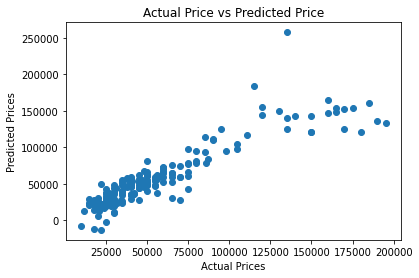

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price") 
plt.show()

**Future Predictions**

In [ ]:
df_new = df.sample(1)

In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
584,Benelli,Benelli TNT 25,160000,2017,0,0,2009,170994


In [ ]:
df_new.shape

(1, 8)

In [ ]:
X_new = df_new.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([134754.50848985])